# Módulo 05 - Detecção de Objetos com YOLOv8

A detecção de objetos é uma tarefa fundamental em visão computacional, com amplas aplicações em áreas como segurança, vigilância, automação industrial e assistência ao condutor. A YOLO (You Only Look Once) é uma das arquiteturas mais populares para detecção de objetos em tempo real, destacando-se pela sua rapidez e precisão.

Neste módulo de introdução às técnicas de Processamento de Imagem, você vai conhecer os fundamentos da manipulação da imagem, além de desenvolver projetos como chroma keying e detecção de desmatamento a partir de imagens de satélites.


<left><img width="60%" src="https://images.unsplash.com/photo-1644249037434-774be636bf11?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"></left>


---

Os exemplos foram construídos com base nos materiais disponibilizados pela Roboflow, através do tutorial de Piotr Skalski disponível em [roboflow/notebooks.](https://github.com/roboflow/notebooks/tree/main?tab=readme-ov-file)

In [ ]:
#Exibir informações sobre as GPUs
!nvidia-smi

Mon Feb 19 17:11:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Instalar Ultralytics (YOLOv8)

O Ultralytics YOLOv8 é uma implementação de alto desempenho e fácil utilização da arquitetura YOLO.

Desenvolvido pela Ultralytics, esse framework oferece uma versão otimizada da YOLOv8 com suporte a uma ampla variedade de tarefas de detecção de objetos em imagens e vídeos.


<left><img width="60%" src="https://repository-images.githubusercontent.com/535360445/8edcff89-0b35-411c-a21b-138a5d714226"></left>



Ele se destaca pela sua velocidade, precisão e facilidade de uso, tornando-se uma escolha popular para aplicações de visão computacional em diversas áreas, como segurança, automação e reconhecimento de padrões.

In [ ]:
# Instalação do pacote Ultralytics
!pip install ultralytics

# Limpando a saída no IPython Notebook
from IPython import display
display.clear_output()

# Importando o pacote Ultralytics e imprimindo informações sobre a instalação
import ultralytics
print(ultralytics.checks())

Ultralytics YOLOv8.1.16 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)
None


In [ ]:
#Download do arquivo com !wget

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm" -O mall.mp4 && rm -rf /tmp/cookies.txt

display.clear_output()

!ls

mall.mp4


In [ ]:
#Defininho o caminho do arquivo
MALL_PATH = "mall.mp4"

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

# 1. Criar Modelo
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 205MB/s]


In [ ]:
!pip install supervision
display.clear_output()

import supervision as sv
print("Supervision", sv.__version__)

Supervision 0.18.0


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

# 1. Criar Modelo
model = YOLO("yolov8s.pt")

In [ ]:
generator = sv.get_video_frames_generator(MALL_PATH)

frame = next(generator)
# cv2.imwrite("frame_reference.jpg", frame)



0: 736x1280 1 person, 4 bottles, 1 chair, 1 tv, 2 refrigerators, 425.3ms
Speed: 61.0ms preprocess, 425.3ms inference, 1631.9ms postprocess per image at shape (1, 3, 736, 1280)


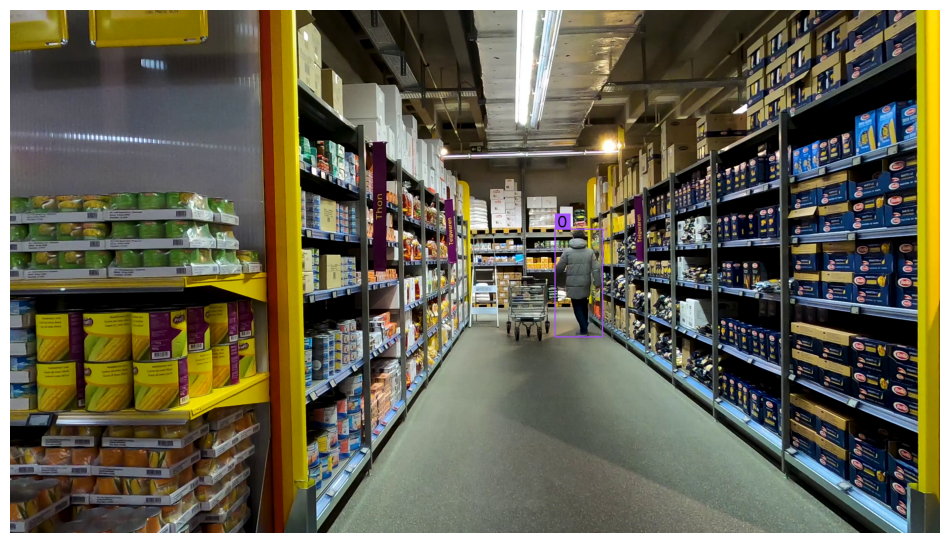

In [ ]:
frame = next(generator)

# 2. Detectar objetos
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results) # para facilitar a sua vida e você sair com seu conjuge
detections = detections[detections.class_id == 0] # filtrando os resultados (apenas pessoas -> class_id == 0)

# 3 Anotar as informações relevantes
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2) # criando a minha anotação
box_annotator.annotate(scene=frame, detections=detections)  # de fato anoto em cima do frame (imagem)

%matplotlib inline
sv.plot_image(image=frame, size=(12, 12))

In [ ]:
frame = next(generator)

# 1. Criar Modelo
model = YOLO("yolov8s.pt")

# 2. Detectar objetos
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results) # para facilitar a sua vida e você sair com seu cônjuge
detections = detections[detections.class_id == 0]


# 3. Anotar as informações relevantes

# 3.1 Criar zona de monitoramento
polygon = np.array([
    [1312, 2150],
    [1920, 1274],
    [2372, 1258],
    [3548, 2146],
    [1308, 2150]
    ])

# extrair informaçÕes do meu vídeo
video_info = sv.VideoInfo.from_video_path(video_path=MALL_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)


0: 736x1280 1 person, 3 bottles, 1 chair, 2 tvs, 2 refrigerators, 8.2ms
Speed: 6.9ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


In [ ]:
detections


Detections(xyxy=array([[     2245.9,      911.33,      2441.3,      1350.4]], dtype=float32), mask=None, confidence=array([     0.9034], dtype=float32), class_id=array([0]), tracker_id=None, data={})

<ipython-input-14-ae665ae171d0>:5: DeprecationWarning: white is deprecated: `Color.white()` is deprecated and will be removed in `supervision-0.20.0`. Use `Color.WHITE` instead.
  zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)


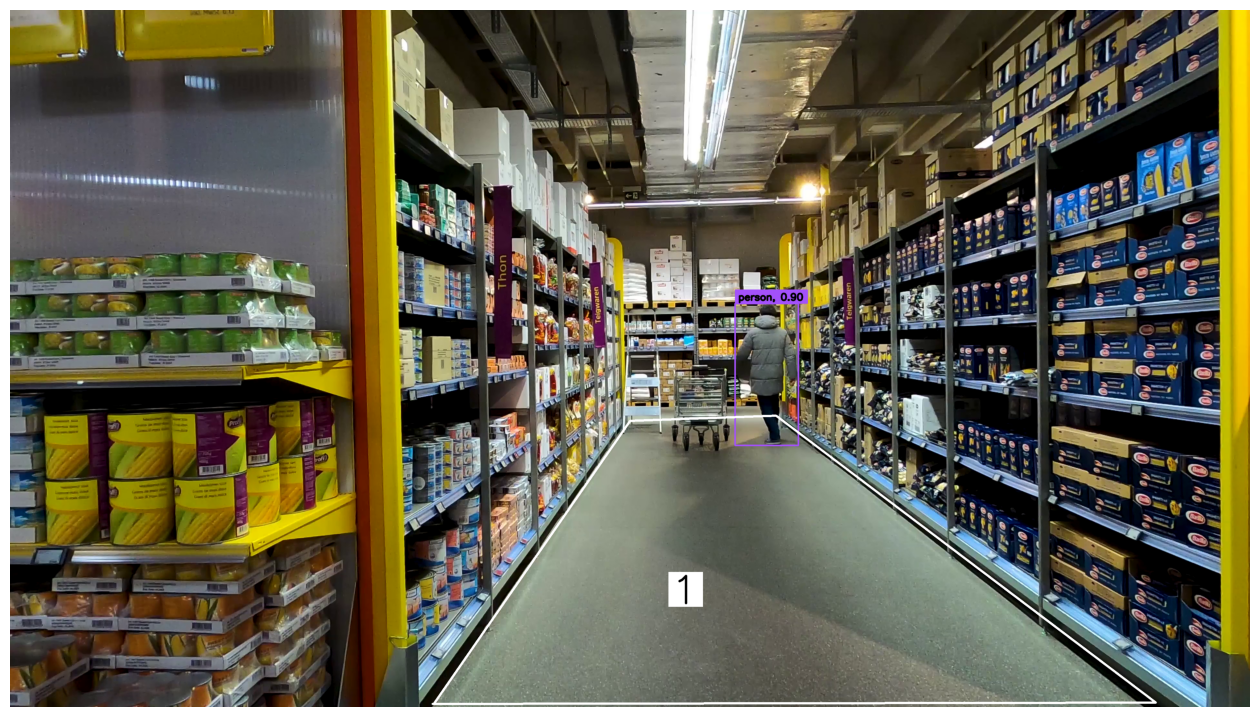

In [ ]:
# criar objetos de anotações
labels = [f"{model.names[class_id]}, {confidence:0.2f}" for _, _, confidence, class_id, _ , _ in detections]

box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=1)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.white(), thickness=6, text_thickness=6, text_scale=4)
zone.trigger(detections=detections)

box_annotator.annotate(scene=frame, detections=detections, labels=labels)
zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.plot_image(image=frame, size=(16, 16))